<a href="https://colab.research.google.com/github/nupatige/Templates_Machine-learning/blob/main/02_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf  
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# allow plots to appear directly in the notebook
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Templates/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data information

In [ ]:
# shape of the DataFrame
data.shape

(200, 4)

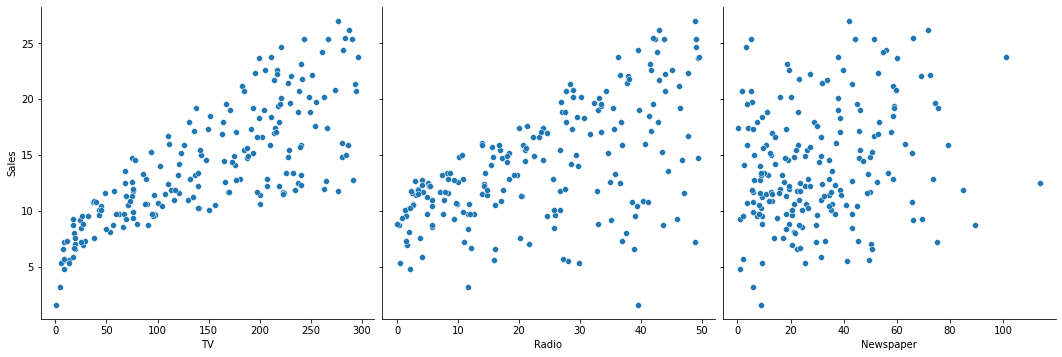

In [ ]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5)

## Linear regression with single input varaible

### STATS Model

In [ ]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [ ]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
x_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
lm1.predict(x_new)

0    9.409426
dtype: float64

In [ ]:
# print the R-squared value for the model
lm1.rsquared

0.611875050850071

### SCIKIT-Learn Model

In [ ]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
x = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(x, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.032593549127695
[0.04753664]


In [ ]:
# predict for a new observation
lm2.predict(np.array([[50]]))

array([9.40942557])

In [ ]:
# print the R-squared value for the model
lm2.score(x, y)

0.611875050850071

## Linear regression with multiple input variable

### STATS Model

In [ ]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm1.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [ ]:
# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        06:52:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
x_new = pd.DataFrame({'TV': [50], 'Radio':[35], 'Newspaper' : [45]})

# predict for a new observation
lm1.predict(x_new)

0    11.778985
dtype: float64

### SCIKIT Learn Model

In [ ]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
x = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(x, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.0457646454553976),
 ('Radio', 0.18853001691820448),
 ('Newspaper', -0.0010374930424763285)]

In [ ]:
# predict for a new observation
lm2.predict(np.array([[50,35,45]]))

array([11.77898505])

In [ ]:
# print the R-squared value for the model
lm2.score(x, y)

0.8972106381789521

## Feature selection

### STATS Model

In [ ]:
### STATSMODELS ###

# only include TV and Radio in the model

# instantiate and fit model
lm1 = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()

# calculate r-square & Adj.square
print('R_Square = {0}'.format(lm1.rsquared))
print('Adjusted_R_Square = {0}'.format(lm1.rsquared_adj))


R_Square = 0.8971942610828956
Adjusted_R_Square = 0.8961505479974428


In [ ]:
# add Newspaper to the model (which we believe has no association with Sales)
# Calculate Adj R2 and then decide on the independent variables to choose for modelling

lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

print('R_Square = {0}'.format(lm1.rsquared))
print('Adjusted_R_Square = {0}'.format(lm1.rsquared_adj))

R_Square = 0.8972106381789522
Adjusted_R_Square = 0.8956373316204668


In [ ]:
# Similary calculate the R2 & Adj R2 for all combinations of independent variables & then decide which independent
# variables to be choosen.

### SCIKIT Learn Model

In [ ]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'Radio']
x = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(x, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

2.921099912405138
[0.04575482 0.18799423]


In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.045754815101076145), ('Radio', 0.18799422662030918)]

In [ ]:
# print the R-squared  #Adj.square value for the model

print('R_Square = {0}'.format(lm2.score(x, y)))

Adj_R2 = 1 - (1-lm2.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted_R_Square = {0}'.format(Adj_R2))



R_Square = 0.8971942610828956
Adjusted_R_Square = 0.8961505479974428


In [ ]:
# add Newspaper to the model (which we believe has no association with Sales) as calculated before the Adjusted R2 
# does not change
# Calculate Adj R2 and then decide on the independent variables to choose for modelling

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
x = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(x, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.0457646454553976),
 ('Radio', 0.18853001691820448),
 ('Newspaper', -0.0010374930424763285)]

In [ ]:
# print the R-squared  #Adj.square value for the model

print('R_Square = {0}'.format(lm2.score(x, y)))

Adj_R2 = 1 - (1-lm2.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted_R_Square = {0}'.format(Adj_R2))

R_Square = 0.8972106381789521
Adjusted_R_Square = 0.8956373316204667


In [ ]:
# Similary calculate the R2 & Adj R2 for all combinations of independent variables & then decide which independent
# variables to be choosen.

## Regression plot 

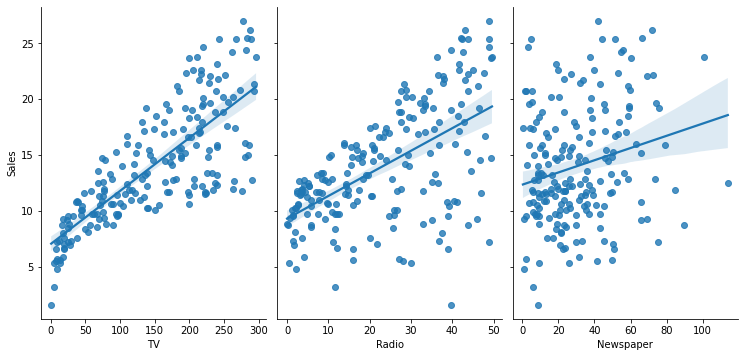

In [ ]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=0.7, kind='reg')

## Gradient discent example

slope = 4.704000000000001 , intercept = 1.344 , Iteration= 1, cost = 80.0
slope = 0.48383999999999894 , intercept = 0.21503999999999945 , Iteration= 2, cost = 63.96876800000005
slope = 4.2330624000000014 , intercept = 1.2923904000000004 , Iteration= 3, cost = 51.18316052480006
slope = 0.8665251839999977 , intercept = 0.3977379839999995 , Iteration= 4, cost = 40.985650461409364
slope = 3.8545266278400026 , intercept = 1.2621678182400007 , Iteration= 5, cost = 32.85194127170138
slope = 1.168719210086397 , intercept = 0.5540481859583993 , Iteration= 6, cost = 26.36397009523322
slope = 3.5498302710743066 , intercept = 1.248415255363585 , Iteration= 7, cost = 21.18838137691584
slope = 1.4068896714090058 , intercept = 0.6887502843897442 , Iteration= 8, cost = 17.059362494501098
slope = 3.3041637132220787 , intercept = 1.2472431966110624 , Iteration= 9, cost = 13.764957488068132
slope = 1.59415884357791 , intercept = 0.8056857028066946 , Iteration= 10, cost = 11.136154103309472
slope = 3.1057

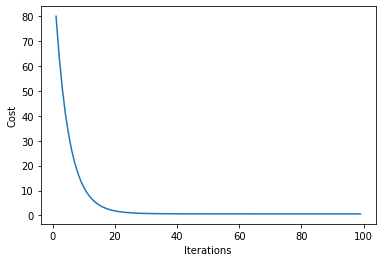

In [ ]:
# Assignment  Slope, Intercept, Cost Function, Iterations. Plot (y: cost, x: iterations)

import numpy as np
import seaborn as sns
import pandas as pd

def gradient_descent(x,y):
    
    m = 0
    c = 0
    iterations = 100
    n = len(x)
    learning_rate = 0.08
    cost_1 = []
    iteration_1 = []
    
    for i in range(1,iterations):
        
        y_predicted = m * x + c
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        dm = -(2/n) * sum (x *(y-y_predicted))
        dc = -(2/n) * sum(y-y_predicted)
        
        m = m - learning_rate * dm
        c = c - learning_rate * dc
        
        cost_1.append(cost)
        iteration_1.append(i)
        
        print("slope = {} , intercept = {} , Iteration= {}, cost = {}". format(m,c,i,cost))
    data = pd.DataFrame(list(zip(iteration_1, cost_1)),columns =['Iterations', 'Cost'])
    return sns.lineplot(x='Iterations', y='Cost', data = data)

x = np.array([1,2,3,4,5])
y = np.array([5,6,7,11,13])

gradient_descent(x,y)